In [2]:
using Flux
using Zygote

using Plots

### <span style="color:orange">write a function and make a function for the gradient of the function</span>

In [18]:
f1(x) = 3x^2 - 2x + 10 # the function
df1(x) = gradient(f1, x)[1] # the gradient function df/dx = 6x - 2
d2f1(x) = gradient(df1, x)[1] # acceleration d²f/dx² = 6

d2f1 (generic function with 1 method)

In [20]:
grad1 = df1(10) # gradient at 1 point
grads2 = df1.([1,2,10]) #gradient at multiple points
accelerations = d2f1.([1,2,10])
println("grad1 = $(grad1), grads2 = $(grads2), accelerations = $(accelerations)")

grad1 = 58.0, grads2 = [4.0, 10.0, 58.0], accelerations = [6.0, 6.0, 6.0]


### <span style="color:orange">We can find the gradient of a function with various computations inside and especially the well known MSE</span>

In [35]:
f_mse(x, y) = sum((x .- y).^2)

f_mse (generic function with 1 method)

In [41]:
xx = [2,1,0]
yy = [2,0,1]
grads = gradient(f_mse, xx, yy)
println("grads = $(grads)")

grads = ([0.0, 2.0, -2.0], [-0.0, -2.0, 2.0])


In [42]:
xx = [2,1,0]
yy = [2,0,1]
gs = gradient(Flux.params(xx, yy)) do
         f_mse(xx, yy)
        end

Grads(...)

In [43]:
fieldnames(typeof(gs))

(:grads, :params)

In [44]:
gs.grads

IdDict{Any, Any} with 4 entries:
  [2, 0, 1]  => [-0.0, -2.0, 2.0]
  :(Main.xx) => [0.0, 2.0, -2.0]
  [2, 1, 0]  => [0.0, 2.0, -2.0]
  :(Main.yy) => [-0.0, -2.0, 2.0]

In [45]:
gs.params

Params([[2, 1, 0], [2, 0, 1]])

In [47]:
gs[xx]

3-element Vector{Float64}:
  0.0
  2.0
 -2.0

In [49]:
gs[yy]

3-element Vector{Float64}:
 -0.0
 -2.0
  2.0

### <span style="color:orange">linear regression</span>

In [61]:
x, y = rand(5), rand(2) # 5 features (dims) -> 2 featuers (dims)
W = rand(2, 5)
b = rand(2)
m1(x) = W*x .+ b
function loss1(x, y)
    y_hat = m1(x)
    sum((y .- y_hat).^2)
end
loss1(x,y)

2.6413084651379

In [62]:
gs = gradient(() -> loss1(x, y), Flux.params(W, b))

Grads(...)

In [63]:
gs[W]

2×5 Matrix{Float64}:
 1.11801  0.738165  0.497641  0.293601  1.86301
 1.37459  0.90757   0.611847  0.360981  2.29057

In [64]:
gs[b]

2-element Vector{Float64}:
 2.050970584123454
 2.521656900454917

In [65]:
W_grad = gs[W]

2×5 Matrix{Float64}:
 1.11801  0.738165  0.497641  0.293601  1.86301
 1.37459  0.90757   0.611847  0.360981  2.29057

### <span style="color:orange">Update parameter **W** (the transformation matrix) by a step</span>

In [66]:
W = W .- (0.1 .* W_grad )

2×5 Matrix{Float64}:
 0.368965   0.541657   0.773674  0.337563  -0.02013
 0.823958  -0.0434863  0.16209   0.198202  -0.0327843

In [67]:
loss1(x,y)

1.4221196010200685

### <span style="color:orange">And another step in that direction</span>

In [68]:
W = W .- (0.1 .* W_grad )
loss1(x,y)

0.5773611424017321

### <span style="color:orange">And another step</span>

In [69]:
W = W .- (0.1 .* W_grad )
loss1(x,y)

0.10703308928289071

### <span style="color:orange">And another step</span>

In [70]:
W = W .- (0.1 .* W_grad )
loss1(x,y)

0.011135441663544512

### <span style="color:orange">Layers (sequential transformations)</span>

In [74]:
W1 = rand(3, 5) #5 to 3 transformation
b1 = rand(3)
layer1(x) = W1 * x .+ b1

W2 = rand(2, 3) #3 to 2 transformation
b2 = rand(2)
layer2(x) = W2 * x .+ b2

m2(x) = layer2(sigmoid.(layer1(x)))

m2(rand(5)) #transforming 5 to 3, then 3 to 2 dims with an activation layer of sigmoid 

2-element Vector{Float64}:
 1.9995948052567933
 1.7037513960875303

In [76]:
x, y = rand(5), rand(2)
function loss2(x, y)
    y_hat = m2(x)
    sum((y .- y_hat).^2)
end

loss2 (generic function with 1 method)

In [77]:
gs = gradient(() -> loss2(x, y), Flux.params(W1, b1, W2, b2))

Grads(...)

In [78]:
gs[W1]

3×5 Matrix{Float64}:
 0.0858024  0.316283  0.437786  0.141176   0.0700564
 0.033757   0.124434  0.172237  0.0555424  0.0275621
 0.0711572  0.262298  0.363063  0.117079   0.0580988

In [79]:
gs[W2]

2×3 Matrix{Float64}:
 2.98021  2.9593   2.8915
 1.74865  1.73638  1.69659

In [81]:
loss2(x, y)

4.260343925485792

In [82]:
W1_grad = gs[W1]
W2_grad = gs[W2]

2×3 Matrix{Float64}:
 2.98021  2.9593   2.8915
 1.74865  1.73638  1.69659

In [83]:
W1 = W1 .- (0.1 .* W1_grad ) 
W2 = W2 .- (0.1 .* W2_grad ) 

2×3 Matrix{Float64}:
 0.670774   -0.0277169  0.118853
 0.0157749   0.073581   0.500474

In [84]:
loss2(x, y)

1.4628725867177643

In [85]:
W1 = W1 .- (0.1 .* W1_grad ) 
W2 = W2 .- (0.1 .* W2_grad ) 

2×3 Matrix{Float64}:
  0.372753  -0.323647  -0.170297
 -0.15909   -0.100057   0.330814

In [86]:
loss2(x, y)

0.13576939432941476

In [ ]:
### <span style="color:orange"></span>

### <span style="color:orange">Look at a simple function to 'fit'</span>

In [2]:
function target_function(x)
    4x + 2
end

target_function (generic function with 1 method)

### <span style="color:orange">training and testing data</span>

In [3]:
x_train, x_test = hcat(0:5...), hcat(6:10...)

([0 1 … 4 5], [6 7 … 9 10])

In [4]:
y_train, y_test = target_function.(x_train), target_function.(x_test)

([2 6 … 18 22], [26 30 … 38 42])

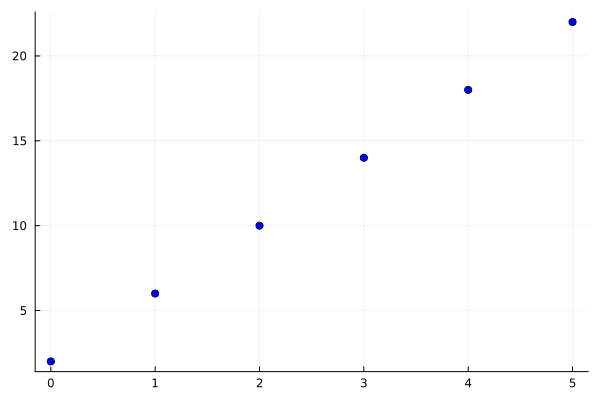

In [5]:
plot(x_train, y_train, legend=false, linetype="scatter", color="blue")

### <span style="color:orange">The Single Neuron Model</span>
**supervised learning**

Labeled data, D = $\{(x_1,y_2),(x_2,y_2),\ldots,(x_n,y_n)\}$

Each data point can be considered to be a 'signal' (common in the journal publications to see the data points referred to as) x_i

$x_i + 1 \rightarrow (w_1,b) \rightarrow z = w_1 * x_i + b \rightarrow a = \phi(z) $

Here $z$ can be considered to be a 'pre-activation' and $a$ a post-activation, that exists within the neuron. That is within the single neuron there are 2 steps, the production of $z$ that is a linear 'projection'/'transformation' and the $a$ is the 'activation' that is typically non-linear (eg. sigmoid or rectified linear units 'relu')

There is a 'cost' function for the neuron, in a manner similar to that of the common statistical fits

$C(w,b) = \sum_{i=1}^N dist(y,\hat{y}_i)$

The cost function gives us a 'landscape' (hyperdimensional surface of $y$ and $\hat{y}$ similarity for the parameters of the model) to minimize the cost (degree of fit). Our goal is to find $W$ and $b$ which minimizes $C$. The cost function can from a variety of forms based upon the 'dist' function where in regression cases it is often mean squared error, and in categorical predictions cross entropy

### <span style="color:orange">Produce a dense layer of 1 element, a 1 to 1 transformation</span>

The Dense function produces a **dense** layer of connections between the neurons (input dimensions). The first argument is the input dimension (input feature size) and the second value is the output dimension (output layer feature size)

In [6]:
model = Dense(1,1)

Dense(1 => 1)       # 2 parameters

In [7]:
typeof(model)

Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}

In [8]:
fieldnames(typeof(model))

(:weight, :bias, :σ)

In [9]:
model.weight

1×1 Matrix{Float32}:
 1.5517563

In [10]:
model.bias

1-element Vector{Float32}:
 0.0

In [11]:
model.σ

identity (generic function with 1 method)

### <span style="color:orange">See what the random untrained model parameters produce for the model outputs</span>

In [12]:
model(x_train)

1×6 Matrix{Float32}:
 0.0  1.55176  3.10351  4.65527  6.20703  7.75878

In [13]:
loss(x,y) = Flux.mse(model(x), y)

loss (generic function with 1 method)

### <span style="color:orange">Current loss of the model and its randomly initialized parameters</span>

In [14]:
loss(x_train,y_train)

83.42649f0

### <span style="color:orange">Define an optimizer to change the parameters according the loss function</span>

The step size is the $\eta$ argument/parameter value

there is also the popular alternative of **ADAM**

In [15]:
opt = Flux.Descent(0.05) #non-stochastic

Descent(0.05)

### <span style="color:orange">package the data into 'tuples' that makes it easy to send to the learning scheme</span>

This follows the feature and target pairing of the fundamental nature of the supervised learning scheme

In [16]:
data = [(x_train, y_train)] #array of tuples

1-element Vector{Tuple{Matrix{Int64}, Matrix{Int64}}}:
 ([0 1 … 4 5], [2 6 … 18 22])

In [17]:
parameters = Flux.params(model)

Params([Float32[1.5517563;;], Float32[0.0]])

### <span style="color:orange">Train the model parameters now</span>

The training uses the gradient from the optimizer to change the parameters so that the model loss is reduced (descent of the loss)

In [18]:
println("loss original = $(loss(x_train,y_train))")

Flux.train!(loss, parameters, data, opt)

println("loss after training = $(loss(x_train,y_train))")

loss original = 83.42649
loss after training = 0.4562064


In [19]:
model.weight

1×1 Matrix{Float32}:
 4.29598

In [20]:
model.bias

1-element Vector{Float32}:
 0.81206095

### <span style="color:orange">Let us redo the learning scheme but differently this time</span>

In [21]:
model = Dense(1,1)

Dense(1 => 1)       # 2 parameters

In [22]:
model.weight

1×1 Matrix{Float32}:
 -1.2775202

In [23]:
model.bias

1-element Vector{Float32}:
 0.0

In [24]:
parameters = Flux.params(model)

Params([Float32[-1.2775202;;], Float32[0.0]])

In [25]:
loss(x_train,y_train)

312.0872f0

In [26]:
rand(1:20) #get a random number from the range

7

### <span style="color:orange">Use the Stochastic approach (faster) as the gradient for each data point is not being calculated</span>

In [27]:
println("loss original = $(loss(x_train,y_train))")

(mm,nn) = size(x_train)
println(size(x_train))
for epoch in 1:1_000
    ii = rand(1:nn)
    data = [(x_train[:,ii],y_train[:,ii])]
    Flux.train!(loss, parameters, data, opt)
end

println("loss after training = $(loss(x_train,y_train))")

loss original = 312.0872
(1, 6)
loss after training = 3.031649e-13


In [28]:
model.weight

1×1 Matrix{Float32}:
 3.9999998

In [29]:
model.bias

1-element Vector{Float32}:
 2.000001

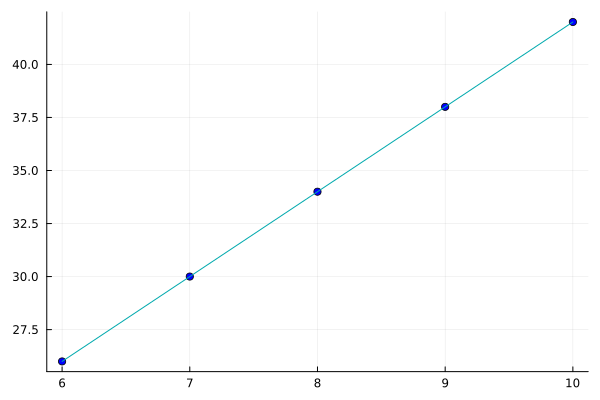

In [30]:
plot(x_test, y_test, legend=false, linetype="scatter", color="blue")
domain = LinRange(6,10,100)
plot!(domain, domain .* model.weight .+ model.bias, legend=false)

### <span style="color:orange">Let's make a set of **predictions** from the model</span>

In [31]:
model([7 8 .5 100])

1×4 Matrix{Float64}:
 30.0  34.0  4.0  402.0

### <span style="color:orange">Let us look at the same problem in a slightly different approach</span>

- Flux assumes that the features span the 'rows' and not the columns, meaning that each column is a data point. 
- We often use a **DataLoader** object to encapsulate the features and targets and set the batch size for the SGD
- The Adam optimizer is very popular and well known as it handles 'momenta'

In [38]:
#hcat makes sure that this x data is a row and not a default column
x_train, x_test = hcat(rand(1:100,20)...), hcat(rand(1:100,20)...)
y_train, y_test = target_function.(x_train), target_function.(x_test)

([222 374 … 366 70], [162 146 … 130 74])

In [39]:
W = rand()
b = rand()
model1(x) = W*x .+ b
function loss1(x,y)
    y_hat = model1.(x)[1]
    sum((y .- y_hat).^2)
end
pars = Flux.params(model1)
opt = Flux.Adam(0.01)      # will store optimiser momentum
loader = Flux.DataLoader( (x_train, y_train) , batchsize=2, shuffle=true )

MLUtils.DataLoader{Tuple{Matrix{Int64}, Matrix{Int64}}, Random._GLOBAL_RNG, Val{nothing}}(([55 93 … 91 17], [222 374 … 366 70]), 2, false, true, true, false, Val{nothing}(), Random._GLOBAL_RNG())

In [40]:
for (x,y) in (x_train,y_train)
    println(x," ",y)
end

55 93
222 374


In [34]:
for epoch in 1:1_000
    for (x, y) in loader
        y_hat = model1(x)
        loss1(y, y_hat)
        Flux.train!(loss1, pars, (x,y), opt)
    end
end

LoadError: MethodError: no method matching loss1(::Matrix{Int64})
[0mClosest candidates are:
[0m  loss1(::Any, [91m::Any[39m) at In[33]:4

In [101]:
#plot(losses)

In [102]:
W

0.18349628499663506

In [32]:
### <span style="color:orange"></span>
### <span style="color:orange"></span>


### <span style="color:orange">produce some ground truth parameters</span>

In [36]:
W_truth = [1 2 3 4 5]
display( W_truth )

2×5 Matrix{Int64}:
 1  2  3  4  5
 5  4  3  2  1

In [38]:
b_truth = [ -2.0 ]
display( b_truth )

1-element Vector{Float64}:
 -2.0

### <span style="color:orange">produce a ground truth model to produce data</span>

In [12]:
ground_truth_model(x) = (W_truth * x) .+ b_truth

ground_truth_model (generic function with 1 method)

### <span style="color:orange">produce some *training feature* data</span>

In [145]:
NN = 10^3
x_train = [ 5 .* rand(5) for _ in 1:NN ]
println( size( x_train ) )
display( x_train[1:4] )

(1000,)


4-element Vector{Vector{Float64}}:
 [2.1208584464907614, 4.163429508817119, 1.7837581819243453, 4.191883360153838, 0.9090654523496511]
 [2.5236466993444058, 0.5522780451803794, 4.308994851030602, 3.5725598676226236, 2.2233108849818866]
 [1.0168668447179057, 4.720139202172423, 0.0335506960345161, 4.052071949031639, 1.5691063438533743]
 [1.537624116410331, 1.7997210953088234, 4.538404390194335, 0.5282918858982111, 1.1087434807820133]

### <span style="color:orange">produce some *training target* data</span>

In [146]:
y_train = [ ground_truth_model(x) + 0.2 .* randn(2) for x in x_train ]
println( size( y_train ) )
display( y_train[1:4] )

(1000,)


4-element Vector{Vector{Float64}}:
 [35.982321957464244, 39.91723968690263]
 [40.89538747080707, 35.14593318607259]
 [33.78056442140868, 31.656362480792733]
 [25.634360399374426, 28.4468328996352]

### <span style="color:orange">define the model</span>

In [147]:
model_to_fit(x) = W1*x .+ b1

model_to_fit (generic function with 1 method)

### <span style="color:orange">Initialize the model parameters</span>

In [189]:
W1 = rand( 2, 5 ) .+ 10
b1 = rand( 2 ) .+ 10

2-element Vector{Float64}:
 10.27977596938496
 10.752576902079465

### <span style="color:orange">define the loss function</span>

In [190]:
function loss1( x, y )
    y_hat = model_to_fit( x ) #y_hat is our prediction based upon the model given the current value of the parameters 
    sum( ( y .- y_hat ).^2 ) #this is the sum of squared errors (SSE) of the prediction for these parameter values
end

loss1 (generic function with 1 method)

### <span style="color:orange">set the optimizer for parameter for the gradients</span>

In [191]:
opt = Flux.Adam(0.01) # an alternative is >Descent(0.01)< 

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

### <span style="color:orange">get the parameters of the model which need to be optimized</span>

In [192]:
ps = Params( [model_to_fit] ) # Params is part of Zygote.jl, as Zygote allows a dictionary style retrieval of the parameter variables
#alternative forms are >Params([W1,b1])< , using flux >Flux.params(W1, b1)< or >Flux.params(model_to_fit)<

Params([model_to_fit])

### <span style="color:orange">We can calculate the loss for each setting of the parameters which is needed to find the **gradient** </span>

In [193]:
gs = gradient( Params([W1,b1]) ) do #using Zygote.jl
    l1 = loss1(x_train[1],y_train[1])
    println(l1)
    return l1
end

24237.961876376605


Grads(...)

In [194]:
gs[W1]

2×5 Matrix{Float64}:
 479.536  941.371  403.316  947.805  205.544
 454.025  891.29   381.86   897.381  194.609

In [195]:
gs[b1]

2-element Vector{Float64}:
 226.10475919027664
 214.07588695837143

In [196]:
gs = gradient(Flux.params(x_train, y_train)) do #using Flux.jl
    l1 = loss1(x_train[1],y_train[1])
    println(l1)
    return l1
end

24237.961876376605


Grads(...)

In [197]:
train_data = zip( x_train, y_train )

ps = Flux.params( model_to_fit )

loss_log = []

for (x,y) in train_data
    gs = gradient( ps ) do #using Flux.jl
        l1 = loss1(x,y)
        Zygote.ignore_derivatives() do # code in this 'block' is not part of the differentiated set (not part of the optimization)
            push!(loss_log, l1)
        end
        return l1
    end
    Flux.Optimise.update!(opt, ps, gs)
end

In [198]:
loss_log

1000-element Vector{Any}:
 24237.961876376605
 24093.623717882045
 18884.228937818887
 13464.934682025541
  9472.990301449478
 31403.13484342039
 16700.79033210296
 15297.859388950936
 13660.081499067375
 12317.934664637005
 18941.627383771804
 16515.51335477688
 22488.66343331941
     ⋮
 22173.70908233695
  8887.247844694572
 37537.70818517936
 31591.92454538282
 17988.07626468913
 29712.204483713125
 37370.469458890584
 19132.197662348208
 26474.38283523103
 15120.480969724633
 36310.313945297996
 26813.532422541026

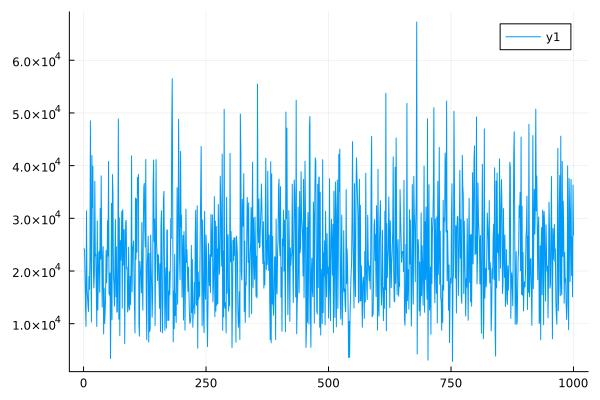

In [199]:
plot(loss_log)

In [176]:
Flux.train!(loss1, Flux.params(W1, b1), train_data, opt)

In [177]:
@show W1

W1 = [0.8526601897901432 1.8089781878686866 2.843352512230477 3.783402383418999 4.840248197918984; 4.797194978205234 3.7688514161715436 2.779565643803137 1.7445006592620482 0.808295954025268]


2×5 Matrix{Float64}:
 0.85266  1.80898  2.84335  3.7834  4.84025
 4.79719  3.76885  2.77957  1.7445  0.808296

In [178]:
@show b1

b1 = [1.3049211044422402, 0.9647066212655245]


2-element Vector{Float64}:
 1.3049211044422402
 0.9647066212655245

In [179]:
@show maximum(abs, W1 .- W_truth)

maximum(abs, W1 .- W_truth) = 0.2554993407379518


0.2554993407379518

In [188]:
fieldnames(typeof(model_to_fit))

()

In [184]:
sigmoid

σ (generic function with 2 methods)

In [181]:
σ


σ (generic function with 2 methods)

In [ ]:
### <span style="color:orange"></span>

In [ ]:
### <span style="color:orange"></span>

In [ ]:
### <span style="color:orange"></span>

In [20]:
### <span style="color:orange"></span>

In [21]:
### <span style="color:orange"></span>

In [22]:
### <span style="color:orange"></span>

In [23]:
### <span style="color:orange"></span>

In [24]:
### <span style="color:orange"></span>

In [25]:
### <span style="color:orange"></span>

In [26]:
### <span style="color:orange"></span>

In [27]:
### <span style="color:orange"></span>

In [ ]:
### <span style="color:orange"></span>